## Case Study - Image Classification of Devnagri characters images using CNN model

In [1]:
#Importing basic libraries for data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
%matplotlib inline

Using TensorFlow backend.


In [41]:
#For image processing and keras library
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img


<class 'PIL.PngImagePlugin.PngImageFile'>


C:\Users\swath\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [56]:
os.chdir('E:\\NN_casestudy_prac\\Data_extracted\\Data\\Train')
#All the labeled folders contains 1700 pictures which has to be trained through CNN 


In [58]:
#Extracting all the labels using folder names present in the train folder
train_folders = os.listdir()

In [271]:
#Total 46 classes
len(train_folders)

46

In [312]:
train_folders[3] # COntains all 46 class names

'character_13_daa'

In [ ]:
#Converting all the images to array from data -->train folder :
images_array = []
for folder in train_folders:
    src_dir = "E:\\NN_casestudy_prac\\Data_extracted\\Data\\Train"
    src_dir = os.path.join(src_dir,folder)
    os.chdir(src_dir)
    images = os.listdir()
    for i in images:
        img = load_img(i,grayscale=True)
        img_array = img_to_array(img)
        images_array.append(img_array)


In [1]:
#Converting to numpy array 
images_array[1].shape

NameError: name 'images_array' is not defined

In [192]:
#Test data consists of 1024 columns which is flattened array of images
#Converting image to 32X32 size and grayscale
images_array.shape#Totally 78200 =>46 X 1700 in each folder of train data folder

(78200, 32, 32, 1)

In [ ]:
#Labelling all images with class numbers
y_classes = []
for c in range(0,46):
    for i in range(0,1700):
        y_classes.append(c)

#Creating dic of all labels with the names
dic = {}
i = 0
for clas in train_folders:
    dic.update({i:clas})
    i = i+1

In [263]:
dic.items()

dict_items([(0, 'character_10_yna'), (1, 'character_11_taamatar'), (2, 'character_12_thaa'), (3, 'character_13_daa'), (4, 'character_14_dhaa'), (5, 'character_15_adna'), (6, 'character_16_tabala'), (7, 'character_17_tha'), (8, 'character_18_da'), (9, 'character_19_dha'), (10, 'character_1_ka'), (11, 'character_20_na'), (12, 'character_21_pa'), (13, 'character_22_pha'), (14, 'character_23_ba'), (15, 'character_24_bha'), (16, 'character_25_ma'), (17, 'character_26_yaw'), (18, 'character_27_ra'), (19, 'character_28_la'), (20, 'character_29_waw'), (21, 'character_2_kha'), (22, 'character_30_motosaw'), (23, 'character_31_petchiryakha'), (24, 'character_32_patalosaw'), (25, 'character_33_ha'), (26, 'character_34_chhya'), (27, 'character_35_tra'), (28, 'character_36_gya'), (29, 'character_3_ga'), (30, 'character_4_gha'), (31, 'character_5_kna'), (32, 'character_6_cha'), (33, 'character_7_chha'), (34, 'character_8_ja'), (35, 'character_9_jha'), (36, 'digit_0'), (37, 'digit_1'), (38, 'digit_2')

'digit_9'

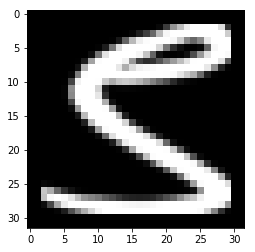

In [259]:
#Sample image with its class name
plt.imshow(images_array[78000,:,:].reshape(32,32),cmap='gray')
dic[y_classes[78000]]

In [195]:
#Splitting the data for test and train images
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(images_array,y_classes,test_size = 0.20, random_state = 200)

In [206]:
#preprocessing image matrix by normalizig grayscale images and converting to array
x=np.array(X_train)
y=keras.utils.to_categorical(np.array(y_train),46)
x=x/255.0

In [260]:
y# For kera softmax classification layer target layer is the categorical layer y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [119]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense,Flatten
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.layers import Dropout

In [185]:
##LeNet model configuration without dropout layer
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=(3,3),padding='same',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='valid'))##padding = 0
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [264]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 6)         60        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 16)        880       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 120)               94200     
_________________________________________________________________
dense_17 (Dense)             (None, 84)               

In [187]:
#Stochaistic gradient descent for batchwise implementation
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [225]:
#CNN model fit for train data with corresponding labels
history=model.fit(x,y,epochs=15,batch_size=1000,validation_split=0.20)

Train on 50048 samples, validate on 12512 samples
Epoch 1/15
50048/50048 [==============================] - 28s 562us/step - loss: 0.3033 - acc: 0.9120 - val_loss: 0.5154 - val_acc: 0.8469
Epoch 2/15
50048/50048 [==============================] - 28s 568us/step - loss: 0.2803 - acc: 0.9190 - val_loss: 0.4257 - val_acc: 0.8722
Epoch 3/15
50048/50048 [==============================] - 28s 569us/step - loss: 0.2429 - acc: 0.9298 - val_loss: 0.3559 - val_acc: 0.8933
Epoch 4/15
50048/50048 [==============================] - 29s 589us/step - loss: 0.2174 - acc: 0.9364 - val_loss: 0.4276 - val_acc: 0.8704
Epoch 5/15
50048/50048 [==============================] - 28s 561us/step - loss: 0.2033 - acc: 0.9406 - val_loss: 0.3822 - val_acc: 0.8852
Epoch 6/15
50048/50048 [==============================] - 26s 511us/step - loss: 0.1859 - acc: 0.9456 - val_loss: 0.3910 - val_acc: 0.8882
Epoch 7/15
50048/50048 [==============================] - 25s 504us/step - loss: 0.1744 - acc: 0.9485 - val_loss: 0.

In [313]:
#Number of incorrect labelling in test data
incorrects = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)

In [314]:
incorrects = np.array(incorrects)

In [315]:
#Precentage of wrong predictions decreased by increasing 10--> 15 epochs
#For further decrease grid search can also be implemented
incorrects.shape[1]/X_test.shape[0]

0.2186700767263427

In [232]:
#Image to be predicted and classfied to its class labels
os.chdir('E:\\NN_casestudy_prac\\Data_extracted\\Data')
x_predict = pd.read_csv('test_X.csv')

In [233]:
#Total 13800 images 32X32 in grayscale
x_predict.shape

(13800, 1024)

In [265]:
#Reshapping for prediction
x_test=np.array(x_predict)
x_test=x_test/255.0
x_test=x_test.reshape(x_test.shape[0],32,32,1)

In [266]:
x_test.shape

(13800, 32, 32, 1)

'character_20_na'

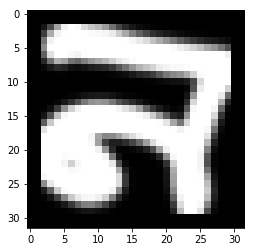

In [267]:
#Testing a random image
plt.imshow(x_test[50,:,:].reshape(32,32),cmap='gray')
model.predict_classes(x_test[50,:,:].reshape(1,32,32,1))
dic[11]
#Correctly predicted

In [278]:
#Labelling all the test data characters and digits in x_test data array of image
labelled_class = []
for i in range(0,13800):
    pred_ = model.predict_classes(x_test[i,:,:].reshape(1,32,32,1))[0]
    labelled_class.append(pred_)
    
    

In [280]:
len(labelled_class)

13800

In [299]:
#Label for images
characters_digits = []
for label in labelled_class:
    characters_digits.append(dic[label])
     

In [301]:
#Image indexes
image_index = list(range(0,13800))

In [303]:
#Creating a dataframe for image and labels final submission file
pred = pd.DataFrame({'Image_Index': image_index, 'Label':characters_digits})

In [306]:
pred.head()

,Image_Index,Label
0,0,character_18_da
1,1,character_8_ja
2,2,digit_0
3,3,character_17_tha
4,4,character_3_ga


[36]


0.9999975

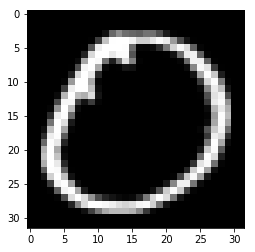

In [311]:
#Testing 2nd image from above predicted data
plt.imshow(x_test[2,:,:].reshape(32,32),cmap='gray')
print(model.predict_classes(x_test[2,:,:].reshape(1,32,32,1)))
dic[36]
#Correctly predicted
p = model.predict_proba(x_test[2,:,:].reshape(1,32,32,1))
np.max(p)
#0.9158482 correctly predicted as 'character_20_na'

In [307]:
pred.drop(['Image_Index'],axis = 1,inplace = True)

In [308]:
#Converting to submission as pred.csv file
os.chdir("E:\\NN_casestudy_prac\\Data_extracted\\Data")
pred.to_csv("pred.csv",index = False)